In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
fast = pd.read_csv("../results/FAST_KNN_NO_MEM.csv")
fast['name'] = "Strat 3. - FAST (AR thres: 25.0)"

fast_obj = pd.read_csv("../results/FAST_KNN_NO_ObjIndex_MEM.csv")
fast_obj['name'] = "Strat 4. - FAST (AR thres: 25.0) w/ Obj. Index"

fast_ar = pd.read_csv("../results/FAST_KNN_NO_MEM2.csv")
fast_ar['name'] = "Strat 3. - FAST (AR thres: 5.0)"

fast_ar_obj = pd.read_csv("../results/FAST_KNN_NO_ObjIndex_MEM3.csv")
fast_ar_obj['name'] = "Strat 4. - FAST (AR thres: 5.0) w/ Obj. Index"


ckqst = pd.read_csv("../results/CkQST_KNN_NO_MEM.csv")
ckqst['name'] = "CkQST (baseline)"

res = pd.concat([
    fast.loc[:, ['create_mem', 'search_mem', 'num_queries', 'name']],
    fast_obj.loc[:, ['create_mem', 'search_mem', 'num_queries', 'name']],
    fast_ar.loc[:, ['create_mem', 'search_mem', 'num_queries', 'name']],
    fast_ar_obj.loc[:, ['create_mem', 'search_mem', 'num_queries', 'name']],
    ckqst.loc[:, ['create_mem', 'search_mem', 'num_queries', 'name']]
]).rename(columns={'create_mem': "After creation", 'search_mem': "After search"})

res

,After creation,After search,num_queries,name
0,39074408,95348208,100000,Strat 3. - FAST (AR thres: 25.0)
1,192551640,717180944,500000,Strat 3. - FAST (AR thres: 25.0)
2,384394208,1759936320,1000000,Strat 3. - FAST (AR thres: 25.0)
3,766913624,3855648136,2000000,Strat 3. - FAST (AR thres: 25.0)
4,955351360,5277818496,2500000,Strat 3. - FAST (AR thres: 25.0)
0,104603928,164364696,100000,Strat 4. - FAST (AR thres: 25.0) w/ Obj. Index
1,255766800,352555976,500000,Strat 4. - FAST (AR thres: 25.0) w/ Obj. Index
2,444842720,584989232,1000000,Strat 4. - FAST (AR thres: 25.0) w/ Obj. Index
0,39074408,75062960,100000,Strat 3. - FAST (AR thres: 5.0)
1,192551640,276696000,500000,Strat 3. - FAST (AR thres: 5.0)


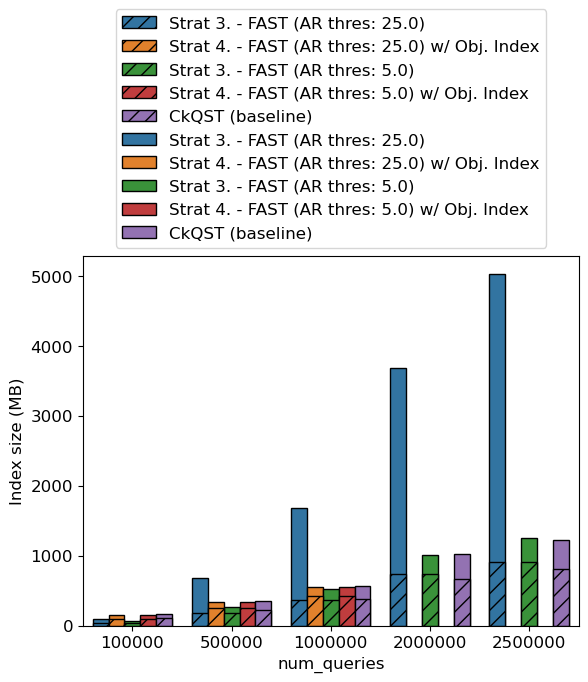

In [3]:
out = res.melt(id_vars=["name", 'num_queries'], var_name="State")
out['value'] = out['value'] / 1048576
# out = out[out['num_queries'] < 2000000]
out.set_index(["name", "num_queries", "State"], inplace=True)
# out["vcs"] = out.groupby(level=["name", "num_queries"]).cumsum()
out.reset_index(inplace=True) 
# out = out.rename(columns={"num_queries": "No. of queries", 'value': "Index size (MB)"})

for i, g in enumerate(out.groupby("State")):
    ax = sns.barplot(data=g[1],
                     x="num_queries",
                     y="value",
                     hue="name",
                     # color=c[i],
                     zorder=-i, # so first bars stay on top
                     edgecolor="k")
    if i == 0:
        for bar in ax.patches:
            bar.set_hatch('//')

plt.ylabel('Index size (MB)')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))

# for i, g in enumerate(dfall.groupby("variable")):
#     plt.figure()
#     sns.lineplot(x="No. of queries", y='Index size (MB)', style='name', data=out[out['State'] == state], errorbar=None, markers=True)
#     plt.show()
    # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1))

In [4]:
out

,name,num_queries,State,value
0,Strat 3. - FAST (AR thres: 25.0),100000,After creation,37.264259
1,Strat 3. - FAST (AR thres: 25.0),500000,After creation,183.631554
2,Strat 3. - FAST (AR thres: 25.0),1000000,After creation,366.586884
3,Strat 3. - FAST (AR thres: 25.0),2000000,After creation,731.385826
4,Strat 3. - FAST (AR thres: 25.0),2500000,After creation,911.094055
5,Strat 4. - FAST (AR thres: 25.0) w/ Obj. Index,100000,After creation,99.758080
6,Strat 4. - FAST (AR thres: 25.0) w/ Obj. Index,500000,After creation,243.918228
7,Strat 4. - FAST (AR thres: 25.0) w/ Obj. Index,1000000,After creation,424.235077
8,Strat 3. - FAST (AR thres: 5.0),100000,After creation,37.264259
9,Strat 3. - FAST (AR thres: 5.0),500000,After creation,183.631554


In [5]:
dfall.reset_index(inplace=True) 

NameError: name 'dfall' is not defined